# Teach my computer to identify defferent arts
dataset from https://www.kaggle.com/datasets/thedownhill/art-images-drawings-painting-sculpture-engraving

### Import TensorFlow

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

from PIL import Image
import os, os.path
import numpy as np

### Download and prepare the Art Image dataset


I modify this dataset by cut down the number of photos to 100 in each categories in training set, asnd 30 in test set.
then i crop those images to the same size and save then in the new folder.


In [ ]:
imgs = []
path = "/Users/turqoise/week2/data/ArtDataset/test_set/5"
new_path = "/Users/turqoise/dataset/test/5"
valid_images = [".jpg",".gif",".png",".tga",".jpeg"]
size = 512

for i,f in enumerate(os.listdir(path)):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    
    img = Image.open(os.path.join(path,f))
    w,h = img.size
    filename = str(i) + ".jpg"
    print(filename)
    if w==h:
        img.resize((size,size)).convert('RGB').save(os.path.join(new_path,filename))
    
    elif w>h:
        img.crop(((w-h)/2,0,(w-h)/2+h,h)).resize((size,size)).convert('RGB').save(os.path.join(new_path,filename))
    
    elif h>w:
        img.crop((0,(h-w)/2,w,(h-w)/2+w)).resize((size,size)).convert('RGB').save(os.path.join(new_path,filename))
        
    if i%100==0:


In [21]:
## Load the data from the files as traing and test sets

In [22]:
train_imgs = []
test_imgs = []
train_labels = []
test_labels = []

labels = {
    1:"drawing",
    2:"engraving",
    3:"iconography",
    4:"painting",
    5:"sculpture",
}

valid_images = [".jpg",".gif",".png",".tga",".jpeg"]
size = 512

for n in range(1,6):
    train_path = "/Users/turqoise/dataset/training"
    train_path = os.path.join(train_path,str(n))
    for i,f in enumerate(os.listdir(train_path)):
        ext = os.path.splitext(f)[1]
        if ext.lower() not in valid_images:
              continue
        
        train_imgs.append(np.array(Image.open(os.path.join(train_path,f))))
        train_labels.append([int(n)])
    
train_images = np.array(train_imgs)
train_labels = np.array(train_labels)

for n in range(1,6):
    test_path = "/Users/turqoise/dataset/test"
    test_path = os.path.join(test_path,str(n))
    for i,f in enumerate(os.listdir(test_path)):
        ext = os.path.splitext(f)[1]
        if ext.lower() not in valid_images:
              continue
        
        test_imgs.append(np.array(Image.open(os.path.join(test_path,f))))
        test_labels.append([int(n)])
    
test_images = np.array(test_imgs)
test_labels = np.array(test_labels)
train_images, test_images = train_images / 255.0, test_images / 255.0




# for n in range(0,1):
#    train_images_1.append(train_images[n].tolist())

# (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1

# print(train_images)
print(len(train_images))
print(train_images)
print(len(test_images))


        


500
[[[[0.9254902  0.69411765 0.4745098 ]
   [0.92156863 0.69019608 0.47058824]
   [0.9254902  0.69411765 0.4745098 ]
   ...
   [0.62352941 0.56470588 0.45098039]
   [0.63921569 0.58039216 0.45882353]
   [0.59607843 0.54509804 0.41960784]]

  [[0.91372549 0.68235294 0.4627451 ]
   [0.90588235 0.6745098  0.45490196]
   [0.90980392 0.67843137 0.45882353]
   ...
   [0.56470588 0.49803922 0.38823529]
   [0.65098039 0.59215686 0.47058824]
   [0.64705882 0.58823529 0.45882353]]

  [[0.91372549 0.67843137 0.46666667]
   [0.89803922 0.6627451  0.45098039]
   [0.89803922 0.6627451  0.45098039]
   ...
   [0.45490196 0.38823529 0.27058824]
   [0.59607843 0.53333333 0.40392157]
   [0.63529412 0.57254902 0.43921569]]

  ...

  [[0.89803922 0.81568627 0.70196078]
   [0.90980392 0.82745098 0.71372549]
   [0.91764706 0.83529412 0.72156863]
   ...
   [0.88627451 0.89019608 0.76470588]
   [0.8745098  0.89019608 0.76078431]
   [0.8627451  0.87843137 0.74901961]]

  [[0.87843137 0.81960784 0.69803922]
   

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


In [23]:
train_images.shape


(500, 512, 512, 3)

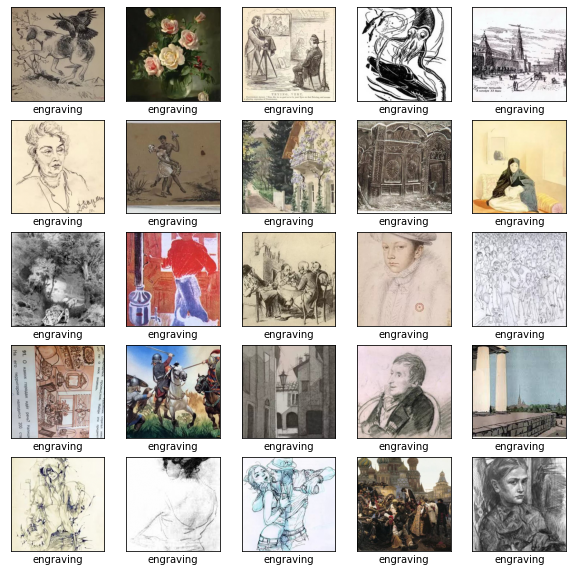

In [24]:
class_names = ['drawing','engraving','iconography','painting','sculpture']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create the neural network

We're going to skip over the details for now of how this works. We'll talk about this in lecture next week. If you want more information now, though, feel free to refer to the [Original tutorial](https://www.tensorflow.org/tutorials/images/cnn). 

For now, trust that the code below makes a new neural network in keras. Each `.add()` function call either adds a new layer of neurons of a particular type, or specifies some processing that will be applied to the neurons in the layer that was just added.

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 3)))

model.add(layers.MaxPooling2D((2, 2))) # 512 510 255

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))# 255 253 

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

### Compile and train the model

The `compile` function specifies which optimisation algorithm to use when training the network. Here, we are using the "adam" optimizer and we are telling it to minimise a particular type of error (loss) called "sparse categorical cross-entropy" (more on these later; don't worry for now). The `metrics=['accuracy']` bit tells it to print out the model accuracy on the training and test datasets after every epoch (training pass). Validation set should generally improve as you train for more epochs, though sometimes the model begins to *overfit* and you will see validation set accuracy decrease even if training set accuracy continues to be good.

The `fit` function actually does the model training. The code below specifies that 10 training epochs should be performed. Note that we pass the "validation data" (i.e., our hold-out set) to the `fit` function only for the purposes of computing the accuracy on this dataset after each epoch, which we'll examine later, below.

In [ ]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


2022-05-13 11:33:24.650326: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - ETA: 0s - loss: 1.7136 - accuracy: 0.2880

2022-05-13 11:33:32.834871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 9s 540ms/step - loss: 1.7136 - accuracy: 0.2880 - val_loss: 1.3362 - val_accuracy: 0.3987
Epoch 2/10
16/16 [==============================] - 9s 574ms/step - loss: 1.1517 - accuracy: 0.5540 - val_loss: 1.1421 - val_accuracy: 0.5556
Epoch 3/10
16/16 [==============================] - 7s 431ms/step - loss: 0.9749 - accuracy: 0.6560 - val_loss: 1.1940 - val_accuracy: 0.5621
Epoch 4/10
16/16 [==============================] - 7s 430ms/step - loss: 0.8498 - accuracy: 0.6740 - val_loss: 0.9898 - val_accuracy: 0.6928
Epoch 5/10
16/16 [==============================] - 7s 451ms/step - loss: 0.6119 - accuracy: 0.7860 - val_loss: 1.0530 - val_accuracy: 0.6013
Epoch 6/10
16/16 [==============================] - 7s 425ms/step - loss: 0.4859 - accuracy: 0.8460 - val_loss: 1.0325 - val_accuracy: 0.6144
Epoch 7/10
16/16 [==============================] - 7s 446ms/step - loss: 0.4211 - accuracy: 0.8520 - val_loss: 1.1390 - val_accuracy: 0.7124
Epoch 8/10
16/16 

### Plot how accuracy changes over time on the training set and the test ("validation") set

In [ ]:
plt.plot(history.history['accuracy'], label='training set accuracy')
plt.plot(history.history['val_accuracy'], label = 'test set accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
#You can use code like this to test a trained model on any other dataset
# Here we're using test_images and test_labels again, but you could imagine replacing this with totally different data
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Test accuracy after final epoch is ", test_acc*100)